# WeatherPy
----


In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
#I had a ModuleError here until I figure out they have to be on the same folder 
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#Based on one query, I checked the key values 
# query = query_url + "London"
# response_json = requests.get(query).json()
    
# city = response_json["name"]
# lng = response_json["coord"]["lon"]
# lat = response_json["coord"]["lat"]
# max_temp = response_json["main"]["temp_max"]
# humidity = response_json["main"]["humidity"]
# cloudiness = response_json["clouds"]["all"]
# wind_speed = response_json["wind"]["speed"]
# country = response_json["sys"]["country"]
# date = response_json["dt"]

# print(f"Info on each city:{city}, {city},{lng},{lat},{max_temp},{humidity},{cloudiness},{wind_speed},{country}, {date} ")


In [3]:
#QUERY URL 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
#empty lists for all my city values 

city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Printing message values 
set_count = 1
city_count = 0 


print("Beginning Data Retrieval\n-------------------------")

#Loop through each city
for search in cities:
    
    # Create search query, make request and store in json
    query = query_url + search
    response = requests.get(query)
    response_json = response.json()
    
    # Getting all the data from the cities the API can find 
    try:
        city_count += 1
        city.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        
        print(f"Processing Record {city_count} of Set {set_count}| {search} ")

        
    # Handle exceptions for cities not found 
    except KeyError: 
        print("City not found. Skipping...")
    
    #On the starter book, every set has 50 api calls. 
    #Indicating the set number and reseting the city count to 1. 
    #Because of the import time, setting sleep to pause between city sets. 
    if city_count > 50: 
        set_count +=1
        city_count = 0 
        time.sleep(5)   
    
print("--------------------------\nData Retrieval Complete\n-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1| esperance 
Processing Record 2 of Set 1| cape town 
Processing Record 3 of Set 1| pevek 
Processing Record 4 of Set 1| cabo san lucas 
Processing Record 5 of Set 1| rikitea 
Processing Record 6 of Set 1| buraydah 
Processing Record 7 of Set 1| khatanga 
Processing Record 8 of Set 1| punta arenas 
Processing Record 9 of Set 1| pangnirtung 
Processing Record 10 of Set 1| quatre cocos 
Processing Record 11 of Set 1| ahipara 
Processing Record 12 of Set 1| albany 
Processing Record 13 of Set 1| lebu 
Processing Record 14 of Set 1| barrow 
City not found. Skipping...
Processing Record 16 of Set 1| cidreira 
Processing Record 17 of Set 1| narsaq 
Processing Record 18 of Set 1| cherskiy 
Processing Record 19 of Set 1| bluff 
Processing Record 20 of Set 1| manokwari 
Processing Record 21 of Set 1| tiksi 
Processing Record 22 of Set 1| hasaki 
Processing Record 23 of Set 1| ushuaia 
Processing Record 24 of Set 1| h

Processing Record 51 of Set 4| santa fe 
Processing Record 1 of Set 5| tambun 
Processing Record 2 of Set 5| san jeronimo 
Processing Record 3 of Set 5| namatanai 
Processing Record 4 of Set 5| visby 
Processing Record 5 of Set 5| kavaratti 
Processing Record 6 of Set 5| iqaluit 
Processing Record 7 of Set 5| broome 
Processing Record 8 of Set 5| alyangula 
Processing Record 9 of Set 5| bambous virieux 
Processing Record 10 of Set 5| oconomowoc 
Processing Record 11 of Set 5| ilulissat 
Processing Record 12 of Set 5| mehamn 
Processing Record 13 of Set 5| nuuk 
Processing Record 14 of Set 5| praia da vitoria 
Processing Record 15 of Set 5| isangel 
Processing Record 16 of Set 5| russell 
Processing Record 17 of Set 5| baykit 
Processing Record 18 of Set 5| georgetown 
Processing Record 19 of Set 5| urrao 
Processing Record 20 of Set 5| touros 
Processing Record 21 of Set 5| yorkton 
Processing Record 22 of Set 5| berlevag 
Processing Record 23 of Set 5| emerald 
Processing Record 24 of

Processing Record 51 of Set 8| cadillac 
City not found. Skipping...
Processing Record 2 of Set 9| sawang daen din 
Processing Record 3 of Set 9| zabol 
Processing Record 4 of Set 9| nemuro 
Processing Record 5 of Set 9| fria 
Processing Record 6 of Set 9| mangai 
Processing Record 7 of Set 9| aswan 
Processing Record 8 of Set 9| sitka 
Processing Record 9 of Set 9| bambanglipuro 
Processing Record 10 of Set 9| verkhoyansk 
Processing Record 11 of Set 9| cabo rojo 
Processing Record 12 of Set 9| ukiah 
City not found. Skipping...
Processing Record 14 of Set 9| siguiri 
Processing Record 15 of Set 9| harkany 
Processing Record 16 of Set 9| mogadishu 
Processing Record 17 of Set 9| curvelo 
Processing Record 18 of Set 9| tigil 
Processing Record 19 of Set 9| kilembe 
Processing Record 20 of Set 9| axim 
Processing Record 21 of Set 9| mathbaria 
Processing Record 22 of Set 9| kortkeros 
Processing Record 23 of Set 9| huilong 
Processing Record 24 of Set 9| leshukonskoye 
Processing Record

Processing Record 49 of Set 12| twentynine palms 
Processing Record 50 of Set 12| prieska 
Processing Record 51 of Set 12| ternate 
Processing Record 1 of Set 13| plettenberg bay 
Processing Record 2 of Set 13| chumikan 
Processing Record 3 of Set 13| wukari 
Processing Record 4 of Set 13| durres 
Processing Record 5 of Set 13| rustenburg 
Processing Record 6 of Set 13| prainha 
Processing Record 7 of Set 13| kiunga 
Processing Record 8 of Set 13| sarakhs 
Processing Record 9 of Set 13| vicuna 
Processing Record 10 of Set 13| saint-ambroise 
Processing Record 11 of Set 13| amapa 
Processing Record 12 of Set 13| lewisporte 
--------------------------
Data Retrieval Complete
-------------------------


In [5]:
#Checking how many cities were found 
len(city)

576

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Data Frame 

cities_complete = pd.DataFrame({"City": city,
                                "Lat": lat,
                                "Lng": lng,
                                "Max Temp": max_temp,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Wind Speed": wind_speed,
                                "Country": country, 
                                "Date": date, 
})

cities_complete

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,84.20,21,36,14.97,AU,1619408656
1,Cape Town,-33.9258,18.4232,63.00,88,75,12.66,ZA,1619408574
2,Pevek,69.7008,170.3133,25.61,84,99,2.33,RU,1619408657
3,Cabo San Lucas,22.8909,-109.9124,72.00,50,100,12.57,MX,1619408657
4,Rikitea,-23.1203,-134.9692,77.88,74,28,4.79,PF,1619408615
...,...,...,...,...,...,...,...,...,...
571,Sarakhs,36.5449,61.1577,66.20,42,1,2.30,IR,1619408971
572,Vicuña,-30.0319,-70.7081,53.60,94,0,2.26,CL,1619408741
573,Saint-Ambroise,48.5501,-71.3324,44.01,93,100,4.61,CA,1619408972
574,Amapá,1.0000,-52.0000,70.05,99,100,0.89,BR,1619408972


In [7]:
#Save output to CSV 
cities_complete.to_csv("../output/citiesComplete.csv", index=False, header=True)

In [8]:
cities_complete.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,18.301034,18.061598,60.827899,69.032986,54.135417,7.479392,1.619409e+09
std,33.279489,88.928683,19.085626,23.379678,38.857229,5.275873,1.531418e+02
min,-54.800000,-175.200000,8.600000,6.000000,0.000000,0.110000,1.619408e+09
25%,-8.796925,-60.319550,46.207500,56.000000,15.750000,3.440000,1.619409e+09
50%,21.298450,21.097900,62.610000,73.500000,64.500000,6.095000,1.619409e+09
75%,45.908725,95.998175,75.990000,88.000000,93.000000,10.360000,1.619409e+09
max,78.218600,178.416700,101.030000,100.000000,100.000000,31.070000,1.619409e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#Checking if I have values over 100% in the Humidity column. 
#I have none, so I'll skip a .loc to filter my dataFrame. 
humidity = cities_complete["Humidity"].tolist()
humidity.sort(reverse=True)


#I print it and reviewed that I had no values over 100%. 
#humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

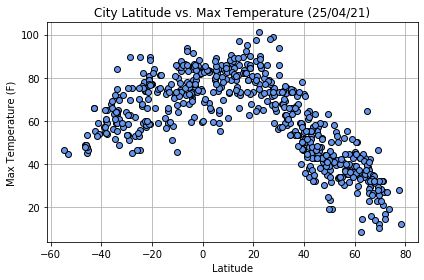

In [30]:
plt.title("City Latitude vs. Max Temperature (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Max Temp"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/01_Latitude_vs_temperature_plot.png")
plt.show()


## Latitude vs. Humidity Plot

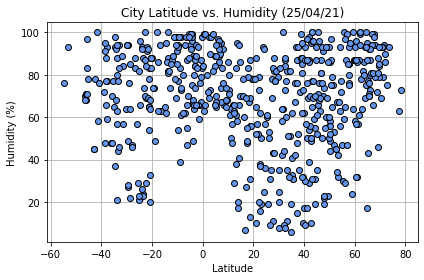

In [32]:
plt.title("City Latitude vs. Humidity (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Humidity"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/02_Latitude_vs_Humidity_plot.png")
plt.show()


## Latitude vs. Cloudiness Plot

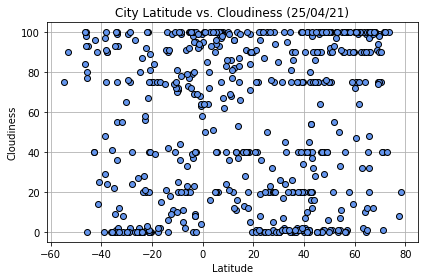

In [34]:
plt.title("City Latitude vs. Cloudiness (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Cloudiness"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/03_Latitude_vs_Cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

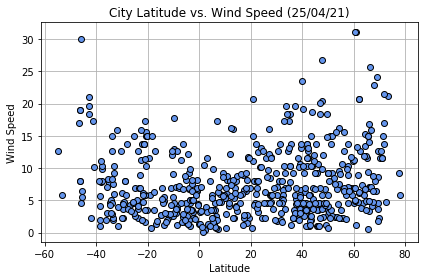

In [36]:
plt.title("City Latitude vs. Wind Speed (25/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(cities_complete["Lat"], cities_complete["Wind Speed"],
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
plt.savefig("Images/04_Latitude_vs_Wind Speed_plot.png")
plt.show()

## Linear Regression

In [47]:
#Using locs to divide Northern and Southern Hemispheres 

north = cities_complete.loc[cities_complete["Lat"]>0]
south = cities_complete.loc[cities_complete["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86
The r-squared is: 0.7459170935629205


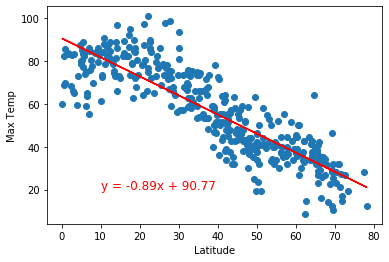

In [56]:
x_values = north["Lat"]
y_values = north["Max Temp"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/05_North_Regression_Latitude_vs_MaxTemp_plot.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.64
The r-squared is: 0.4118407591345891


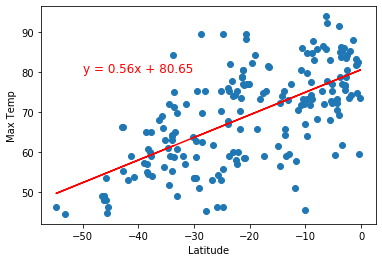

In [63]:
x_values = south["Lat"]
y_values = south["Max Temp"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/06_South_Regression_Latitude_vs_MaxTemp_plot.png")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.12
The r-squared is: 0.015372071251302974


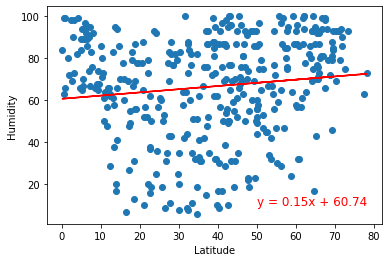

In [60]:
x_values = north["Lat"]
y_values = north["Humidity"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/07_North_Regression_Latitude_vs_Humidity_plot.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.2
The r-squared is: 0.038088137010236105


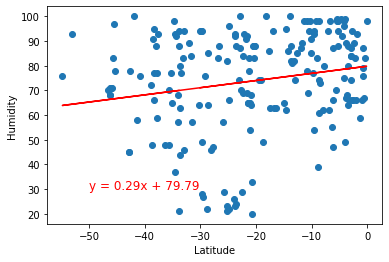

In [64]:
x_values = south["Lat"]
y_values = south["Humidity"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/08_South_Regression_Latitude_vs_Humidity_plot.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.09
The r-squared is: 0.007408791594912802


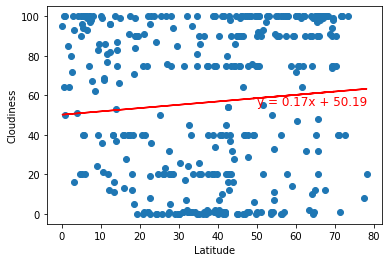

In [69]:
x_values = north["Lat"]
y_values = north["Cloudiness"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,55),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/09_North_Regression_Latitude_vs_Cloudiness_plot.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07
The r-squared is: 0.005421179930057194


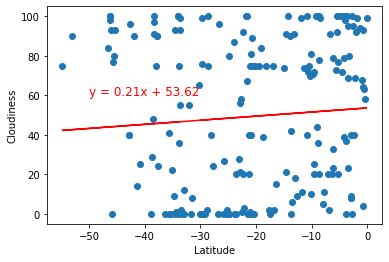

In [72]:
x_values = south["Lat"]
y_values = south["Cloudiness"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/010_South_Regression_Latitude_vs_Cloudiness_plot.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.26
The r-squared is: 0.0699877595799503


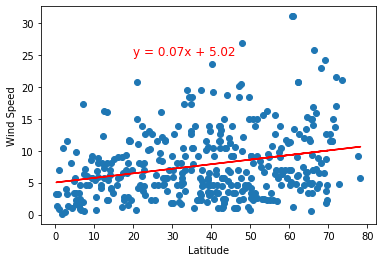

In [75]:
x_values = north["Lat"]
y_values = north["Wind Speed"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/11_North_Regression_Latitude_vs_WindSpeed_plot.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.3
The r-squared is: 0.09250250510808902, -0.3041422448593569


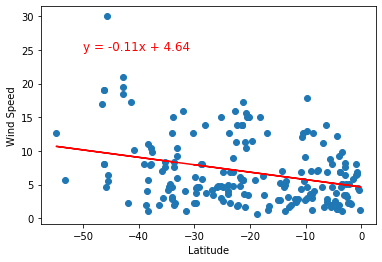

In [80]:
x_values = south["Lat"]
y_values = south["Wind Speed"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=12,color="red")

#Axis 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Show
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}, {rvalue}")
plt.savefig("Images/12_South_Regression_Latitude_vs_WindSpeed_plot.png")
plt.show()
